# 9.2 Optimising with NumPy

*Estimated time for this notebook: 30 minutes*

## NumPy constructors

We saw previously that NumPy's core type is the `ndarray`, or N-Dimensional Array:

In [1]:
import numpy as np

np.zeros([3, 4, 2, 5])[2, :, :, 1]

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

The real magic of numpy arrays is that most python operations are applied, quickly, on an elementwise basis:

In [2]:
x = np.arange(0, 256, 4).reshape(8, 8)

In [3]:
y = np.zeros((8, 8))

In [4]:
%%timeit
for i in range(8):
    for j in range(8):
        y[i][j] = x[i][j] + 10

29.4 µs ± 164 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [5]:
x + 10

array([[ 10,  14,  18,  22,  26,  30,  34,  38],
       [ 42,  46,  50,  54,  58,  62,  66,  70],
       [ 74,  78,  82,  86,  90,  94,  98, 102],
       [106, 110, 114, 118, 122, 126, 130, 134],
       [138, 142, 146, 150, 154, 158, 162, 166],
       [170, 174, 178, 182, 186, 190, 194, 198],
       [202, 206, 210, 214, 218, 222, 226, 230],
       [234, 238, 242, 246, 250, 254, 258, 262]])

Numpy's mathematical functions also happen this way, and are said to be "vectorized" functions.

In [6]:
np.sqrt(x)

array([[ 0.        ,  2.        ,  2.82842712,  3.46410162,  4.        ,
         4.47213595,  4.89897949,  5.29150262],
       [ 5.65685425,  6.        ,  6.32455532,  6.63324958,  6.92820323,
         7.21110255,  7.48331477,  7.74596669],
       [ 8.        ,  8.24621125,  8.48528137,  8.71779789,  8.94427191,
         9.16515139,  9.38083152,  9.59166305],
       [ 9.79795897, 10.        , 10.19803903, 10.39230485, 10.58300524,
        10.77032961, 10.95445115, 11.13552873],
       [11.3137085 , 11.48912529, 11.66190379, 11.83215957, 12.        ,
        12.16552506, 12.32882801, 12.489996  ],
       [12.64911064, 12.80624847, 12.9614814 , 13.11487705, 13.26649916,
        13.41640786, 13.56465997, 13.7113092 ],
       [13.85640646, 14.        , 14.14213562, 14.28285686, 14.4222051 ,
        14.56021978, 14.69693846, 14.83239697],
       [14.96662955, 15.09966887, 15.23154621, 15.3622915 , 15.49193338,
        15.62049935, 15.74801575, 15.87450787]])

Numpy contains many useful functions for creating matrices. In our earlier lectures we've seen `linspace` and `arange` for evenly spaced numbers.

In [7]:
np.linspace(0, 10, 21)

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

In [8]:
np.arange(0, 10, 0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

 Here's one for creating matrices like coordinates in a grid:

In [9]:
xmin = -1.5
ymin = -1.0
xmax = 0.5
ymax = 1.0
resolution = 300
xstep = (xmax - xmin) / resolution
ystep = (ymax - ymin) / resolution
# A numpy "meshgrid" creates a rectangular grid from an array of x values and an array of y values.
ymatrix, xmatrix = np.mgrid[ymin:ymax:ystep, xmin:xmax:xstep]

In [10]:
print(ymatrix)

[[-1.         -1.         -1.         ... -1.         -1.
  -1.        ]
 [-0.99333333 -0.99333333 -0.99333333 ... -0.99333333 -0.99333333
  -0.99333333]
 [-0.98666667 -0.98666667 -0.98666667 ... -0.98666667 -0.98666667
  -0.98666667]
 ...
 [ 0.98        0.98        0.98       ...  0.98        0.98
   0.98      ]
 [ 0.98666667  0.98666667  0.98666667 ...  0.98666667  0.98666667
   0.98666667]
 [ 0.99333333  0.99333333  0.99333333 ...  0.99333333  0.99333333
   0.99333333]]


We can add these together to make a grid containing the complex numbers we want to test for membership in the Mandelbrot set.

In [11]:
values = xmatrix + 1j * ymatrix

In [12]:
print(values)

[[-1.5       -1.j         -1.49333333-1.j         -1.48666667-1.j
  ...  0.48      -1.j          0.48666667-1.j
   0.49333333-1.j        ]
 [-1.5       -0.99333333j -1.49333333-0.99333333j -1.48666667-0.99333333j
  ...  0.48      -0.99333333j  0.48666667-0.99333333j
   0.49333333-0.99333333j]
 [-1.5       -0.98666667j -1.49333333-0.98666667j -1.48666667-0.98666667j
  ...  0.48      -0.98666667j  0.48666667-0.98666667j
   0.49333333-0.98666667j]
 ...
 [-1.5       +0.98j       -1.49333333+0.98j       -1.48666667+0.98j
  ...  0.48      +0.98j        0.48666667+0.98j
   0.49333333+0.98j      ]
 [-1.5       +0.98666667j -1.49333333+0.98666667j -1.48666667+0.98666667j
  ...  0.48      +0.98666667j  0.48666667+0.98666667j
   0.49333333+0.98666667j]
 [-1.5       +0.99333333j -1.49333333+0.99333333j -1.48666667+0.99333333j
  ...  0.48      +0.99333333j  0.48666667+0.99333333j
   0.49333333+0.99333333j]]


## Arraywise Algorithms

We can use this to apply the mandelbrot algorithm to whole *ARRAYS*

In [13]:
z0 = values
z1 = z0 * z0 + values
z2 = z1 * z1 + values
z3 = z2 * z2 + values

In [14]:
print(z3)

[[24.06640625+20.75j       23.16610231+20.97899073j
  22.27540349+21.18465854j ... 11.20523832 -1.88650846j
  11.5734533  -1.6076251j  11.94394738 -1.31225596j]
 [23.82102149+19.85687829j 22.94415031+20.09504528j
  22.07634812+20.31020645j ... 10.93323949 -1.5275283j
  11.28531994 -1.24641067j 11.63928527 -0.94911594j]
 [23.56689029+18.98729242j 22.71312709+19.23410533j
  21.86791017+19.4582314j  ... 10.65905064 -1.18433756j
  10.99529965 -0.90137318j 11.33305161 -0.60254144j]
 ...
 [23.30453709-18.14090998j 22.47355537-18.39585192j
  21.65061048-18.62842771j ... 10.38305264 +0.85663867j
  10.70377437 +0.57220289j 11.02562928 +0.27221042j]
 [23.56689029-18.98729242j 22.71312709-19.23410533j
  21.86791017-19.4582314j  ... 10.65905064 +1.18433756j
  10.99529965 +0.90137318j 11.33305161 +0.60254144j]
 [23.82102149-19.85687829j 22.94415031-20.09504528j
  22.07634812-20.31020645j ... 10.93323949 +1.5275283j
  11.28531994 +1.24641067j 11.63928527 +0.94911594j]]


So can we just apply our `mandel1` function to the whole matrix?

In [15]:
def mandel1(position, limit=50):
    value = position
    while abs(value) < 2:
        limit -= 1
        value = value**2 + position
        if limit < 0:
            return 0
    return limit

In [16]:
mandel1(values)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

No. The *logic* of our current routine would require stopping for some elements and not for others. 

We can ask numpy to **vectorise** our method for us:

In [17]:
@np.vectorize
def mandel2(position, limit=50):
    value = position
    while abs(value) < 2:
        limit -= 1
        value = value**2 + position
        if limit < 0:
            return 0
    return limit

Note that we use a **decorator** here (np.vectorize takes a function as input and returns a function). An equivalent way to write this would be `mandel2 = np.vectorize(mandel1)`.

In [18]:
data5 = mandel2(values)

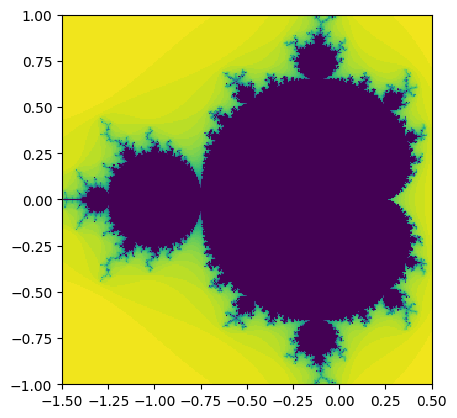

In [19]:
from matplotlib import pyplot as plt

%matplotlib inline
plt.imshow(data5, interpolation="none", extent=[xmin, xmax, ymin, ymax])

Is that any faster?

In [20]:
%%timeit
data5 = mandel2(values)

504 ms ± 2.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


This is not significantly faster. When we use *vectorize* it's just hiding an plain old python for loop under the hood. We want to make the loop over matrix elements take place in the "**C Layer**".

What if we just apply the Mandelbrot algorithm without checking for divergence until the end:

In [21]:
def mandel_numpy_explode(position, limit=50):
    value = position
    while limit > 0:
        limit -= 1
        value = value**2 + position

    return abs(value) < 2

In [22]:
data6 = mandel_numpy_explode(values)

/tmp/ipykernel_17809/3249494863.py:5: RuntimeWarning: overflow encountered in square
  value = value**2 + position
/tmp/ipykernel_17809/3249494863.py:5: RuntimeWarning: invalid value encountered in square
  value = value**2 + position


OK, we need to prevent it from running off to $\infty$

In [23]:
def mandel_numpy(position, limit=50):
    value = position
    while limit > 0:
        limit -= 1
        value = value**2 + position
        diverging = abs(value) > 2
        # Avoid overflow
        value[diverging] = 2

    return abs(value) < 2

In [24]:
data6 = mandel_numpy(values)

In [25]:
%%timeit

data6 = mandel_numpy(values)

43.9 ms ± 39 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


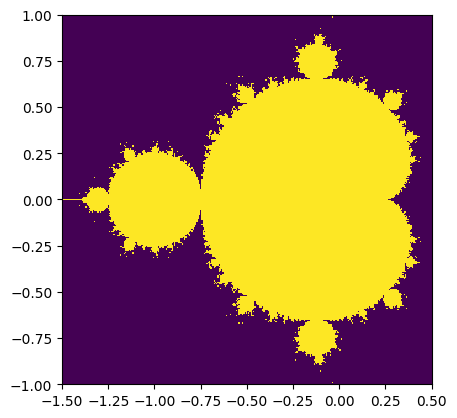

In [26]:
from matplotlib import pyplot as plt

%matplotlib inline
plt.imshow(data6, interpolation="none", extent=[xmin, xmax, ymin, ymax])

Wow, that was TEN TIMES faster.

There's quite a few NumPy tricks there, let's remind ourselves of how they work:

In [27]:
diverging = abs(z3) > 2
z3[diverging] = 2

When we apply a logical condition to a NumPy array, we get a logical array.

In [28]:
x = np.arange(10)
y = np.ones([10]) * 5
z = x > y

In [29]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [30]:
y

array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5.])

In [31]:
print(z)

[False False False False False False  True  True  True  True]


Logical arrays can be used to index into arrays:

In [32]:
x[x > 3]

array([4, 5, 6, 7, 8, 9])

In [33]:
x[np.logical_not(z)]

array([0, 1, 2, 3, 4, 5])

And you can use such an index as the target of an assignment:

In [34]:
x[z] = 5
x

array([0, 1, 2, 3, 4, 5, 5, 5, 5, 5])

Note that we didn't compare two arrays to get our logical array, but an array to a scalar integer -- this is referred to as *broadcasting*.

## More Mandelbrot

Of course, we didn't calculate the number-of-iterations-to-diverge, just whether the point was in the set.

Let's correct our code to do that:


In [35]:
def mandel4(position, limit=50):
    value = position
    # An array which keeps track of the first step at which each position diverged
    diverged_at_count = np.zeros(position.shape)
    while limit > 0:
        limit -= 1
        value = value**2 + position
        diverging = abs(value) > 2
        # Any positions which are:
        # - diverging
        # - haven't diverged before
        # are diverging for the first time
        first_diverged_this_time = np.logical_and(diverging, diverged_at_count == 0)
        # Update diverged_at_count for all positions which first diverged at this step
        diverged_at_count[first_diverged_this_time] = limit
        # Reset any divergent values to exactly 2
        value[diverging] = 2

    return diverged_at_count

In [36]:
data7 = mandel4(values)

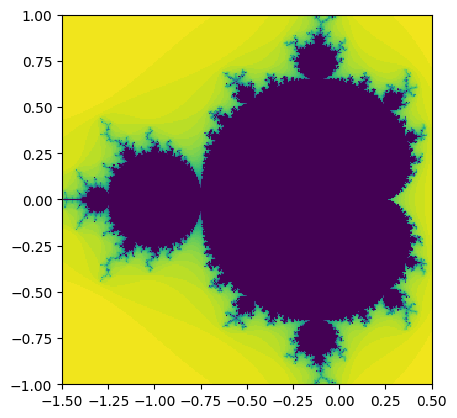

In [37]:
plt.imshow(data7, interpolation="none", extent=[xmin, xmax, ymin, ymax])

In [38]:
%%timeit

data7 = mandel4(values)

45.4 ms ± 93.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Note that here, all the looping over mandelbrot steps was in Python, but everything below the loop-over-positions happened in C. The code was amazingly quick compared to pure Python.

Can we do better by avoiding a square root?

In [39]:
def mandel5(position, limit=50):
    value = position
    diverged_at_count = np.zeros(position.shape)
    while limit > 0:
        limit -= 1
        value = value**2 + position
        diverging = value * np.conj(value) > 4
        first_diverged_this_time = np.logical_and(diverging, diverged_at_count == 0)
        diverged_at_count[first_diverged_this_time] = limit
        value[diverging] = 2

    return diverged_at_count

In [40]:
%%timeit

data8 = mandel5(values)

25.1 ms ± 30.4 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Probably not worth the time I spent thinking about it!

## NumPy Testing

Now, let's look at calculating those residuals, the differences between the different datasets.

In [41]:
data8 = mandel5(values)
data5 = mandel2(values)

In [42]:
np.sum((data8 - data5) ** 2)

0.0

For our non-numpy datasets, numpy knows to turn them into arrays:

In [43]:
xmin = -1.5
ymin = -1.0
xmax = 0.5
ymax = 1.0
resolution = 300
xstep = (xmax - xmin) / resolution
ystep = (ymax - ymin) / resolution
xs = [(xmin + (xmax - xmin) * i / resolution) for i in range(resolution)]
ys = [(ymin + (ymax - ymin) * i / resolution) for i in range(resolution)]
data1 = [[mandel1(complex(x, y)) for x in xs] for y in ys]
sum(sum((data1 - data7) ** 2))

0.0

But this doesn't work for pure non-numpy arrays

In [44]:
data2 = []
for y in ys:
    row = []
    for x in xs:
        row.append(mandel1(complex(x, y)))
    data2.append(row)

In [45]:
data2 - data1

TypeError: unsupported operand type(s) for -: 'list' and 'list'

So we have to convert to NumPy arrays explicitly:

In [46]:
sum(sum((np.array(data2) - np.array(data1)) ** 2))

0

NumPy provides some convenient assertions to help us write unit tests with NumPy arrays:

In [47]:
x = [1e-5, 1e-3, 1e-1]
y = np.arccos(np.cos(x))
y

array([1.00000004e-05, 1.00000000e-03, 1.00000000e-01])

In [48]:
np.testing.assert_allclose(x, y, rtol=1e-6, atol=1e-20)

In [49]:
np.testing.assert_allclose(data7, data1)

## Arraywise operations are fast

Note that we might worry that we carry on calculating the mandelbrot values for points that have already diverged.

In [50]:
def mandel6(position, limit=50):
    value = np.zeros(position.shape) + position
    calculating = np.ones(position.shape, dtype="bool")
    diverged_at_count = np.zeros(position.shape)
    while limit > 0:
        limit -= 1
        value[calculating] = value[calculating] ** 2 + position[calculating]
        diverging_now = np.zeros(position.shape, dtype="bool")
        diverging_now[calculating] = (
            value[calculating] * np.conj(value[calculating]) > 4
        )
        calculating = np.logical_and(calculating, np.logical_not(diverging_now))
        diverged_at_count[diverging_now] = limit

    return diverged_at_count

In [51]:
data8 = mandel6(values)

In [52]:
%%timeit

data8 = mandel6(values)

33.9 ms ± 47.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


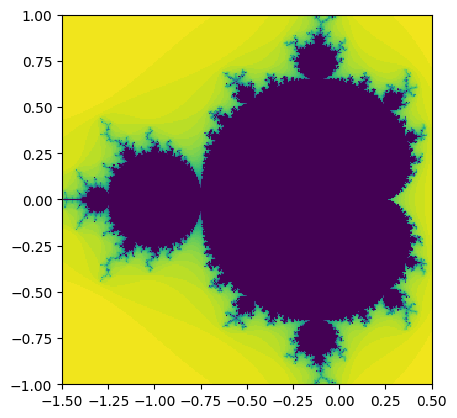

In [53]:
plt.imshow(data8, interpolation="none", extent=[xmin, xmax, ymin, ymax])

This was **not faster** even though it was **doing less work**

This often happens: on modern computers, **branches** (if statements, function calls) and **memory access** is usually the rate-determining step, not maths.

Complicating your logic to avoid calculations sometimes therefore slows you down. The only way to know is to **measure**

## Indexing with arrays

We've been using Boolean arrays a lot to get access to some elements of an array. We can also do this with integers, as well as lists of integers:

In [54]:
x = np.arange(64)
y = x.reshape([8, 8])
y[3]

array([24, 25, 26, 27, 28, 29, 30, 31])

In [55]:
y[[2, 5]]

array([[16, 17, 18, 19, 20, 21, 22, 23],
       [40, 41, 42, 43, 44, 45, 46, 47]])

In [56]:
y[[0, 2, 5], [1, 2, 7]]

array([ 1, 18, 47])

We can use a : to indicate we want all the values from a particular axis:

In [57]:
y[0:4:2, [0, 2]]

array([[ 0,  2],
       [16, 18]])

We can mix array selectors, boolean selectors, :s and ordinary array seqeuencers:

In [58]:
z = x.reshape([4, 4, 4])
z

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]],

       [[16, 17, 18, 19],
        [20, 21, 22, 23],
        [24, 25, 26, 27],
        [28, 29, 30, 31]],

       [[32, 33, 34, 35],
        [36, 37, 38, 39],
        [40, 41, 42, 43],
        [44, 45, 46, 47]],

       [[48, 49, 50, 51],
        [52, 53, 54, 55],
        [56, 57, 58, 59],
        [60, 61, 62, 63]]])

In [59]:
z[:, [1, 3], 0:3]

array([[[ 4,  5,  6],
        [12, 13, 14]],

       [[20, 21, 22],
        [28, 29, 30]],

       [[36, 37, 38],
        [44, 45, 46]],

       [[52, 53, 54],
        [60, 61, 62]]])

We can manipulate shapes by adding new indices in selectors with np.newaxis:

In [60]:
z[:, np.newaxis, [1, 3], 0].shape

(4, 1, 2)

When we use basic indexing with integers and : expressions, we get a **view** on the matrix so a copy is avoided:

In [61]:
a = z[:, :, 2]
a[0, 0] = -500
z

array([[[   0,    1, -500,    3],
        [   4,    5,    6,    7],
        [   8,    9,   10,   11],
        [  12,   13,   14,   15]],

       [[  16,   17,   18,   19],
        [  20,   21,   22,   23],
        [  24,   25,   26,   27],
        [  28,   29,   30,   31]],

       [[  32,   33,   34,   35],
        [  36,   37,   38,   39],
        [  40,   41,   42,   43],
        [  44,   45,   46,   47]],

       [[  48,   49,   50,   51],
        [  52,   53,   54,   55],
        [  56,   57,   58,   59],
        [  60,   61,   62,   63]]])

We can also use ... to specify ": for as many as possible intervening axes":

In [62]:
z[1]

array([[16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [63]:
z[..., 2]

array([[-500,    6,   10,   14],
       [  18,   22,   26,   30],
       [  34,   38,   42,   46],
       [  50,   54,   58,   62]])

However, boolean mask indexing and array filter indexing always causes a copy.

Let's try again at avoiding doing unnecessary work by using new arrays containing the reduced data instead of a mask:

In [64]:
def mandel7(position, limit=50):
    positions = np.zeros(position.shape) + position
    value = np.zeros(position.shape) + position
    indices = np.mgrid[0 : values.shape[0], 0 : values.shape[1]]
    diverged_at_count = np.zeros(position.shape)
    while limit > 0:
        limit -= 1
        value = value**2 + positions
        diverging_now = value * np.conj(value) > 4
        diverging_now_indices = indices[:, diverging_now]
        carry_on = np.logical_not(diverging_now)

        value = value[carry_on]
        indices = indices[:, carry_on]
        positions = positions[carry_on]
        diverged_at_count[
            diverging_now_indices[0, :], diverging_now_indices[1, :]
        ] = limit

    return diverged_at_count

In [65]:
data9 = mandel7(values)

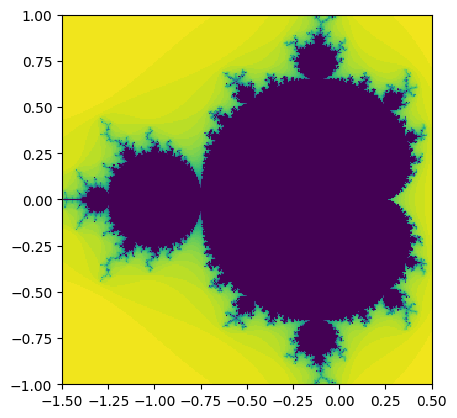

In [66]:
plt.imshow(data9, interpolation="none", extent=[xmin, xmax, ymin, ymax])

In [67]:
%%timeit

data9 = mandel7(values)

49.4 ms ± 428 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Still slower. Probably due to lots of copies -- the point here is that you need to *experiment* to see which optimisations will work. Performance programming needs to be empirical.

## Profiling

We've seen how to compare different functions by the time they take to run. However, we haven't obtained much information about where the code is spending more time. For that we need to use a profiler. IPython offers a profiler through the `%prun` magic. Let's use it to see how it works:

In [68]:
%prun mandel7(values)

`%prun` shows a line per each function call ordered by the total time spent on each of these. However, sometimes a line-by-line output may be more helpful. For that we can use the `line_profiler` package (you need to install it using `pip`). Once installed you can activate it in any notebook by running:

In [69]:
%load_ext line_profiler

And the `%lprun` magic should be now available:

In [70]:
%lprun -f mandel7 mandel7(values)

Here, it is clearer to see which operations are keeping the code busy.